In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from collections import Counter

# Any results you write to the current directory are saved as output.
pd.set_option('display.max_columns', 500)

import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd
gender_submission = pd.read_csv("gender_submission.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


#### How many missing values?

In [5]:
# train.Fare.hist()

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# train.hist();

In [10]:
train.Cabin.value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
E101               3
F33                3
C22 C26            3
D                  3
F2                 3
E44                2
E121               2
C123               2
D17                2
D36                2
F G73              2
E25                2
B58 B60            2
B28                2
E24                2
D26                2
C126               2
B49                2
C78                2
E33                2
B57 B59 B63 B66    2
F4                 2
C83                2
C52                2
E8                 2
C93                2
C124               2
                  ..
D10 D12            1
E77                1
D28                1
A5                 1
C50                1
C87                1
F38                1
A23                1
C111               1
E40                1
E63                1
E58                1
B19                1
B78                1
D50                1
C106               1
D6           

In [11]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Example from kaggle


In [12]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


C:\Users\Ieva\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


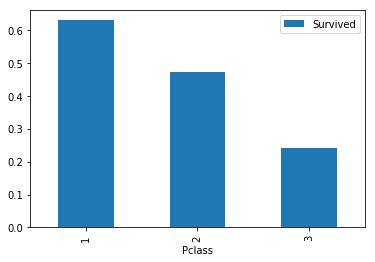

In [13]:
class_pivot = train.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar()
plt.show()

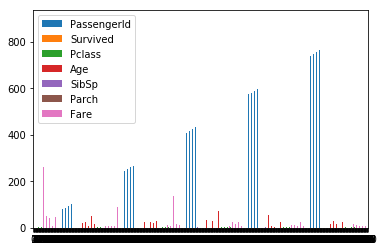

In [14]:
train.plot.bar(rot=0)

#### Create age bin column

In [15]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [52]:
# train['Age'] = train['Age'].astype(str)
bins = pd.IntervalIndex.from_tuples([(0, 14), (14, 24), (25, 64), (65, 80)])
# train['Age'] = train['Age'].fillna(0, inplace = True)
train['Age_group'] = pd.cut(train.Age, bins)
test['Age_group'] = pd.cut(test.Age, bins)


In [17]:
train.Age_group.value_counts()

(25, 64]    402
(14, 24]    200
(0, 14]      77
(65, 80]      8
Name: Age_group, dtype: int64

#### Create fare bin column

In [53]:
fare_bins = pd.IntervalIndex.from_tuples([(0, 100), (14, 24), (25, 64), (65, 80)])
train['Fare_group'] = pd.cut(train.Fare, bins)
test['Fare_group'] = pd.cut(test.Fare, bins)

In [54]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Fare_group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,"(25, 64]","(0, 14]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,"(25, 64]","(0, 14]"
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,"(25, 64]","(0, 14]"
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,"(25, 64]","(0, 14]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,"(14, 24]","(0, 14]"


### Split words

In [20]:
results = Counter()

train['Name'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

results.most_common(100) 

[('Andersson', 9),
 (' Mr. James', 7),
 ('Sage', 7),
 (' Mr. John', 7),
 ('Johnson', 6),
 ('Panula', 6),
 ('Goodwin', 6),
 ('Skoog', 6),
 (' Mr. William', 6),
 ('Carter', 6),
 (' Miss. Mary', 6),
 ('Rice', 5),
 (' Mr. William Henry', 4),
 ('Palsson', 4),
 ('Williams', 4),
 ('Asplund', 4),
 ('Fortune', 4),
 (' Mr. William John', 4),
 ('Harper', 4),
 ('Harris', 4),
 (' Mr. Ivan', 4),
 (' Miss. Bertha', 4),
 ('Ford', 4),
 ('Gustafsson', 4),
 ('Smith', 4),
 ('Lefebre', 4),
 ('Brown', 4),
 ('Kelly', 4),
 ('Hart', 4),
 ('Baclini', 4),
 ('Moran', 3),
 ('Vander Planke', 3),
 ('Meyer', 3),
 ('Laroche', 3),
 ('West', 3),
 ('Johansson', 3),
 ('Jussila', 3),
 (' Mr. Patrick', 3),
 ('Hickman', 3),
 (' Mr. Martin', 3),
 (' Miss. Anna', 3),
 (' Mr. Victor', 3),
 ('Boulos', 3),
 (' Miss. Anna Sofia', 3),
 ('Navratil', 3),
 ('Olsen', 3),
 ('Goldsmith', 3),
 ("O'Brien", 3),
 ('Bourke', 3),
 ('Newell', 3),
 ('Hoyt', 3),
 ('Collyer', 3),
 ('Taussig', 3),
 ('Graham', 3),
 ('Allison', 3),
 (' Mr. Samuel', 3

In [55]:
train['marital_status_Mr'] = train['Name'].str.contains('Mr.')
train['marital_status_Miss'] = train['Name'].str.contains('Miss.')
train['marital_status_Mrs'] = train['Name'].str.contains('Mrs.')
train['marital_status_Ms'] = train['Name'].str.contains('Ms.')
train['name_Andersson'] = train['Name'].str.contains('Andersson')
train['name_Mr_James'] = train['Name'].str.contains('James')
train['name_Sage'] = train['Name'].str.contains('Sage')
train['name_Mr_John'] = train['Name'].str.contains('John')
train['name_Panula'] = train['Name'].str.contains('John')
train['name_Goodwin'] = train['Name'].str.contains('Goodwin')
train['name_Skoog'] = train['Name'].str.contains('Skoog')
train['name_William'] = train['Name'].str.contains('William')
train['name_Carter'] = train['Name'].str.contains('Carter')
train['name_Mary'] = train['Name'].str.contains('Mary')

train['Age_group'] = train.Age_group.astype(str)
train['Fare_group'] = train.Fare_group.astype(str)

test['marital_status_Mr'] = test['Name'].str.contains('Mr.')
test['marital_status_Miss'] = test['Name'].str.contains('Miss.')
test['marital_status_Mrs'] = test['Name'].str.contains('Mrs.')
test['marital_status_Ms'] = test['Name'].str.contains('Ms.')
test['name_Andersson'] = test['Name'].str.contains('Andersson')
test['name_Mr_James'] = test['Name'].str.contains('James')
test['name_Sage'] = test['Name'].str.contains('Sage')
test['name_Mr_John'] = test['Name'].str.contains('John')
test['name_Panula'] = test['Name'].str.contains('John')
test['name_Goodwin'] = test['Name'].str.contains('Goodwin')
test['name_Skoog'] = test['Name'].str.contains('Skoog')
test['name_William'] = test['Name'].str.contains('William')
test['name_Carter'] = test['Name'].str.contains('Carter')
test['name_Mary'] = test['Name'].str.contains('Mary')

test['Age_group'] = test.Age_group.astype(str)
test['Fare_group'] = test.Fare_group.astype(str)


In [29]:
bool_cols = list(train.select_dtypes(include='bool').columns)
text_cols = list(train.drop(['Name', 'Ticket', 'PassengerId', "Cabin"], axis = 1).select_dtypes(include='object').columns)
cols_ = bool_cols + text_cols
# regression_df[float_cols] = regression_df[float_cols].astype(int)

In [140]:
train_df = pd.get_dummies(train, columns = cols_)
train_df.columns = [x.strip().replace(',', '_').replace(']', '_').replace('(', '_') for x in train_df.columns]

test_df = pd.get_dummies(test, columns = cols_)
test_df.columns = [x.strip().replace(',', '_').replace(']', '_').replace('(', '_') for x in test_df.columns]
test_df['name_Skoog_True'] = 0
test_df['name_Carter_True'] = 0

In [141]:
test_df.shape
train_df.shape

(891, 53)

In [127]:
# col_list = (train_df.drop("Survived", axis = 1).append([test_df])).columns.tolist()
# train_df_2 = train_df.loc[:, col_list].fillna(0)
# test_df_2 = test.loc[:, col_list].fillna(0)

In [150]:
train_cols = list(train_df.drop('Survived', axis = 1).columns)

In [151]:
train_df_2 = train_df[train_cols]
test_df_2 = test_df[train_cols]

In [165]:
X, y = train_df_2.drop(["Name", "Ticket", "PassengerId", "Age", "Cabin", "Fare"], axis = 1), train_df.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_val = test_df_2.drop(["Name", "Ticket", "PassengerId", "Age", "Cabin", "Fare"], axis = 1)

In [166]:
# # data_dmatrix = xgb.DMatrix(data = X_train, label = y_train)

# # xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
# #                 max_depth = 5, alpha = 10, n_estimators = 10)

# xg_reg.fit(X_train,y_train)

# preds = xg_reg.predict(X_test)

In [182]:
model = XGBClassifier()
# model.fit(X_train, y_train)
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [183]:
# make predictions for test data
y_pred = model.predict(X_val)
predictions = [round(value) for value in y_pred]

C:\Users\Ieva\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [184]:
newDF = pd.DataFrame() 
newDF['PassengerId'] = test_df.PassengerId
newDF['Survived'] = predictions
newDF.to_csv('my_submission.csv', index=False)


In [185]:
newDF.Survived.sum()

142

In [180]:
newDF.shape

(418, 2)

In [205]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread = 4,
    seed = 42
)

In [219]:
np.arange (2, 3, 10)

array([2])

In [220]:
# parameters = {
# #     'max_depth': np.arange (2, 3, 10),
# #     'n_estimators': np.arange(60, 220, 40),
# #     'learning_rate': [0.1, 0.01, 0.05], 
    
parameters = {"learning_rate": [0.1, 0.01, 0.001],
           "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
           "max_depth": np.arange (2, 10, 1),
           "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
           "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
           "reg_alpha": [0, 0.5, 1],
           "reg_lambda": [1, 1.5, 2, 3, 4.5],
           "min_child_weight": [1, 3, 5, 7],
           "n_estimators": [100, 250, 500, 1000]}
# }

In [221]:
grid_search = GridSearchCV(
    estimator = estimator,
    param_grid = parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [ ]:
grid_search.fit(X, y)


Fitting 10 folds for each of 806400 candidates, totalling 8064000 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.7s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   14.9s


In [213]:
grid_search.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=None, subsample=1, verbosity=1)

In [214]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [215]:
model_upd = XGBClassifier(max_depth = 2,
    n_estimators = 100,
    learning_rate = 0.1)
# model.fit(X_train, y_train)
model_upd.fit(X, y)
y_pred = model_upd.predict(X_val)
predictions = [round(value) for value in y_pred]

C:\Users\Ieva\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [216]:
newDF = pd.DataFrame() 
newDF['PassengerId'] = test_df.PassengerId
newDF['Survived'] = predictions
newDF.to_csv('my_submission_model_2.csv', index=False)


In [218]:
newDF.Survived.sum()

138

In [45]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.45%


In [49]:
list(X_train.columns)

['Pclass',
 'SibSp',
 'Parch',
 'marital_status_Mr_False',
 'marital_status_Mr_True',
 'marital_status_Miss_False',
 'marital_status_Miss_True',
 'marital_status_Mrs_False',
 'marital_status_Mrs_True',
 'marital_status_Ms_False',
 'marital_status_Ms_True',
 'name_Andersson_False',
 'name_Andersson_True',
 'name_Mr_James_False',
 'name_Mr_James_True',
 'name_Sage_False',
 'name_Sage_True',
 'name_Mr_John_False',
 'name_Mr_John_True',
 'name_Panula_False',
 'name_Panula_True',
 'name_Goodwin_False',
 'name_Goodwin_True',
 'name_Skoog_False',
 'name_Skoog_True',
 'name_William_False',
 'name_William_True',
 'name_Carter_False',
 'name_Carter_True',
 'name_Mary_False',
 'name_Mary_True',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Age_group__0_ 14_',
 'Age_group__14_ 24_',
 'Age_group__25_ 64_',
 'Age_group__65_ 80_',
 'Age_group_nan',
 'Fare_group__0_ 14_',
 'Fare_group__14_ 24_',
 'Fare_group__25_ 64_',
 'Fare_group__65_ 80_',
 'Fare_group_nan']

In [47]:
calibrator = CalibratedClassifierCV(model, cv='prefit')
calibrator.fit(X_test, y_test)

ValueError: feature_names mismatch: ['Pclass', 'SibSp', 'Parch', 'marital_status_Mr_False', 'marital_status_Mr_True', 'marital_status_Miss_False', 'marital_status_Miss_True', 'marital_status_Mrs_False', 'marital_status_Mrs_True', 'marital_status_Ms_False', 'marital_status_Ms_True', 'name_Andersson_False', 'name_Andersson_True', 'name_Mr_James_False', 'name_Mr_James_True', 'name_Sage_False', 'name_Sage_True', 'name_Mr_John_False', 'name_Mr_John_True', 'name_Panula_False', 'name_Panula_True', 'name_Goodwin_False', 'name_Goodwin_True', 'name_Skoog_False', 'name_Skoog_True', 'name_William_False', 'name_William_True', 'name_Carter_False', 'name_Carter_True', 'name_Mary_False', 'name_Mary_True', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_group__0_ 14_', 'Age_group__14_ 24_', 'Age_group__25_ 64_', 'Age_group__65_ 80_', 'Age_group_nan', 'Fare_group__0_ 14_', 'Fare_group__14_ 24_', 'Fare_group__25_ 64_', 'Fare_group__65_ 80_', 'Fare_group_nan'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45']
expected name_Mr_James_False, name_Goodwin_True, Sex_male, marital_status_Ms_False, Fare_group__25_ 64_, name_Sage_False, marital_status_Miss_True, name_Andersson_False, name_Carter_False, marital_status_Miss_False, Pclass, Fare_group__65_ 80_, name_Andersson_True, name_Mr_James_True, name_Mr_John_False, Embarked_C, Age_group_nan, name_Mary_False, name_Panula_False, marital_status_Mrs_True, Age_group__14_ 24_, Fare_group__0_ 14_, Sex_female, Embarked_S, Age_group__65_ 80_, name_William_True, name_Skoog_True, name_Carter_True, name_Mary_True, Fare_group__14_ 24_, name_Panula_True, name_Sage_True, Fare_group_nan, marital_status_Mr_False, marital_status_Mrs_False, marital_status_Ms_True, Age_group__25_ 64_, Parch, name_Mr_John_True, Embarked_Q, Age_group__0_ 14_, name_Skoog_False, marital_status_Mr_True, SibSp, name_William_False, name_Goodwin_False in input data
training data did not have the following fields: f3, f34, f0, f22, f8, f29, f39, f35, f38, f27, f5, f40, f6, f9, f36, f16, f41, f30, f43, f4, f42, f33, f24, f45, f17, f21, f26, f31, f13, f23, f25, f28, f18, f32, f37, f7, f1, f11, f14, f15, f2, f20, f10, f44, f12, f19

In [39]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
# prepare data
trainX, trainy = ...
valX, valy = ...
testX, testy = ...
# fit base model on training dataset
model = ...
model.fit(trainX, trainy)
# calibrate model on validation data
calibrator = CalibratedClassifierCV(xg_reg, cv='prefit')
calibrator.fit(valX, valy)
# evaluate the model
yhat = calibrator.predict(testX)

In [ ]:
clf_sigmoid = CalibratedClassifierCV(clf, cv=2, method='sigmoid')
clf_sigmoid.fit(X_train, y_train, sw_train)
prob_pos_sigmoid = clf_sigmoid.predict_proba(X_test)[:, 1]

In [ ]:
train_df['Name'].dtype

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
# output.to_csv('my_submission.csv', index=False)
# print("Your submission was successfully saved!")

In [ ]:
predictions

In [ ]:
X_train.isnull().mean().sort_values(ascending = False)

In [ ]:
list(train_df.columns.values)

In [ ]:
train_df['Age_group_(0, 14]'].str.replace("[()],<", "_")

In [ ]:
train_df.columns